In [219]:
import pandas as pd
import numpy as np
from DataFrameInfo import DataFrameInfo
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('loan_payments_skewness_corrected.csv')

([<matplotlib.patches.Wedge at 0x1f49ac30aa0>,
 [Text(-1.1849652747295496, -0.18936023258626117, 'Paid'),
  Text(1.1849652924587288, 0.18936012164180435, 'Unpaid')],
 [Text(-1.0862181685020873, -0.17358021320407277, '55%'),
  Text(1.086218184753835, 0.17358011150498734, '45%')])

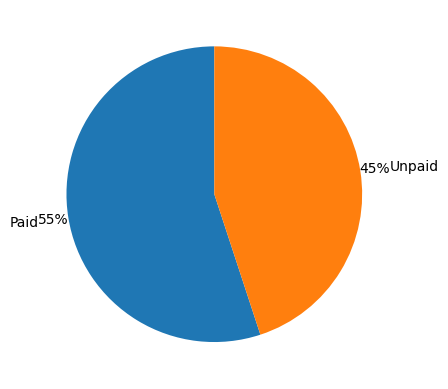

In [220]:
df['percentage_paid'] = df['total_payment']/df['loan_amount'] *100
labels= 'Paid', 'Unpaid'
data = [(df['percentage_paid'] > 100).sum(), (df['percentage_paid'] < 100).sum()]

plt.pie(data, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, startangle = 90)

([<matplotlib.patches.Wedge at 0x1f49acbb3b0>,
 [Text(-0.9381782646042408, -0.7482122318060398, 'Paid'),
  Text(0.9381782646042408, 0.7482122318060397, 'Unpaid')],
 [Text(-0.8599967425538875, -0.6858612124888699, '71%'),
  Text(0.8599967425538875, 0.6858612124888698, '29%')])

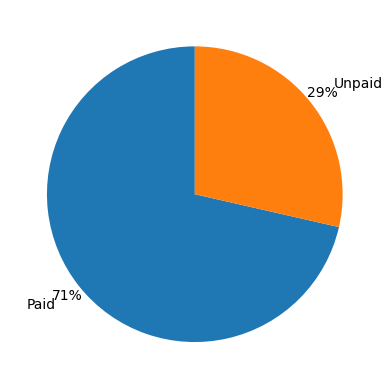

In [221]:
df['future_state_6_months'] = ((df['instalment'] *6) + df['total_payment'])
df['future_percentage_paid'] = df['future_state_6_months']/df['funded_amount'] *100
labels= 'Paid', 'Unpaid'
future_data = [(df['future_percentage_paid'] > 100).sum(), (df['future_percentage_paid'] < 100).sum()]

plt.pie(future_data, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, startangle = 90)

As seen above, currently only 56% of all customers have paid off their loan and it is projected that within six months that this will increase to 71%.

In [222]:
data = DataFrameInfo()
print(data.distinct_values(df['loan_status']))

loan_status
Fully Paid                                             26119
Current                                                18128
Charged Off                                             5146
Does not meet the credit policy. Status:Fully Paid       927
Late (31-120 days)                                       536
Does not meet the credit policy. Status:Charged Off      325
In Grace Period                                          249
Late (16-30 days)                                         90
Default                                                   47
Name: count, dtype: int64


In [223]:
charged_off_only = (df['loan_status'].value_counts()['Charged Off'])
charged_off_cp = (df['loan_status'].value_counts()['Does not meet the credit policy. Status:Charged Off'])
charged_off = charged_off_only + charged_off_cp
charged_off_percentage = (charged_off/df.shape[0] * 100)

print(f'The percentage of loans that represent a loss to the company is {charged_off_percentage}%.')

The percentage of loans that represent a loss to the company is 10.609498322570635%.


In [224]:
charged_off_only_df = df[df['loan_status'].str.match('Charged Off')]
charged_off_cp_df = df[df['loan_status'].str.match('Does not meet the credit policy. Status:Charged Off')]
charged_off_customers= [charged_off_only_df, charged_off_cp_df]
charged_off_customers = pd.concat(charged_off_customers)
charged_off_total_amount = round(charged_off_customers['total_payment'].sum(), 2)

print(f'The total amount of money that was paid towards the company by loans that have been charged off is £{charged_off_total_amount}.')


The total amount of money that was paid towards the company by loans that have been charged off is £36385845.93.


In [225]:
charged_off_customers['multiplier'] = (100+charged_off_customers['int_rate'])/100
charged_off_customers['total_owed'] = charged_off_customers['multiplier'] * charged_off_customers['loan_amount']

charged_off_loss = round((charged_off_customers['total_owed'].sum()) - (charged_off_customers['total_payment'].sum()), 2)

print(f'The total loss made by the loans that have been charged off is £{charged_off_loss}.')


The total loss made by the loans that have been charged off is £49765384.75.


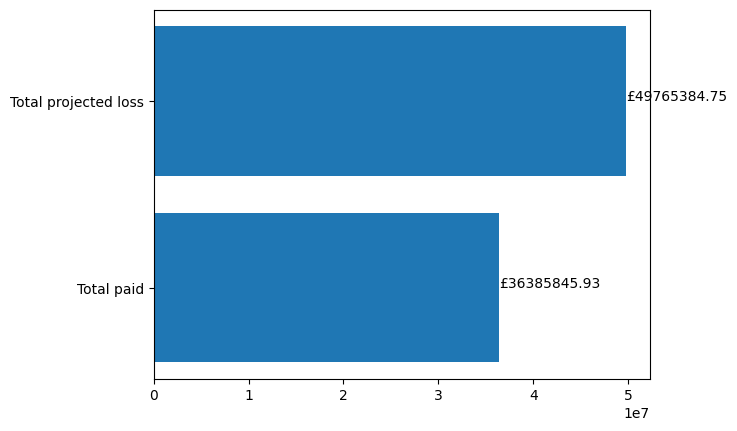

In [226]:
x_axis = ['Total paid', 'Total projected loss']
y_axis = [charged_off_total_amount, charged_off_loss]

plt.barh(x_axis, y_axis)

for index, value in enumerate(y_axis):
    plt.text(value, index,
             str(f'£{value}'))
    
plt.show()

In [227]:
late_customers_31 = (df['loan_status'] == 'Late (31-120 days)').sum()
late_customers_16 = (df['loan_status'] == 'Late (16-30 days)').sum()
late_customers_gp = (df['loan_status'] == 'In Grace Period').sum()
late_customers = late_customers_31 + late_customers_16 + late_customers_gp
print(f'There are currently {late_customers} customers that are overdue')

There are currently 875 customers that are overdue


In [228]:
percentage_overdue = round(late_customers / df.shape[0] * 100, 2)
print(f'{percentage_overdue}% of all customers are overdue on their payments.')


1.7% of all customers are overdue on their payments.


In [229]:
late_customers_31_df = df[(df['loan_status'] == 'Late (31-120 days)')]
late_customers_16_df = df[(df['loan_status'] == 'Late (16-30 days)')]
late_customers_gp_df = df[(df['loan_status'] == 'In Grace Period')]
late_customers_frame = [late_customers_16_df, late_customers_31_df, late_customers_gp_df]
late_customers_df = pd.concat(late_customers_frame)


In [230]:
late_customers_df['multiplier'] = (100 + late_customers_df['int_rate'])/100
late_customers_df['total_owed'] = late_customers_df['multiplier'] * late_customers_df['loan_amount']

late_customers_loss = round((late_customers_df['total_owed'].sum()) - (late_customers_df['total_payment'].sum()), 2)


In [239]:
print(f'The projected loss made by the loans that are currently late is £{late_customers_loss} if their status were to change to Charged Off.')

The projected loss made by the loans that are currently late is £6050264.96 if their status were to change to Charged Off.


In [240]:
total_potential_loss = charged_off_loss + late_customers_loss
df['multiplier'] = (100 + df['int_rate'])/100
df['total_owed'] = df['multiplier'] * df['loan_amount']
total_expected_revenue = round((df['total_owed'].sum()), 2)

percentage_total_loss= round(total_potential_loss / total_expected_revenue * 100, 2)

print(f'If customers late on payments were converted to Charged Off, then the total potential loss from late and Charged Off customers is {percentage_total_loss}% of the total expected revenue.')

If customers late on payments were converted to Charged Off, then the total potential loss from late and Charged Off customers is 7.08% of the total expected revenue.
